In [28]:
from google.colab import drive
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import files
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image
import io
import pickle
import warnings
import shutil
import pandas as pd
import os
import rarfile
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns

**MENYAMBUNGKAN DENGAN DRIVE**

In [26]:
from google.colab import drive
import os

# Menyambungkan Google Drive
drive.mount('/content/drive')

# Definisikan path folder Data_Ikan_Hias
drive_folder = '/content/drive/MyDrive/Data_Ikan_Hias'

# Verifikasi keberadaan folder
if os.path.exists(drive_folder):
    print(f"Folder {drive_folder} ditemukan.")
    print("Isi folder Data_Ikan_Hias:")
    print(os.listdir(drive_folder))
else:
    print(f"Folder {drive_folder} tidak ditemukan. Periksa nama folder atau koneksi Drive.")

# (Opsional) Contoh penggunaan folder untuk proyek
# Misalnya, memeriksa apakah ada file dataset (ikanhias.rar) di folder
dataset_path = os.path.join(drive_folder, 'ikanhias.rar')
if os.path.exists(dataset_path):
    print(f"File dataset {dataset_path} ditemukan, siap digunakan.")
else:
    print(f"File ikanhias.rar tidak ditemukan di {drive_folder}.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folder /content/drive/MyDrive/Data_Ikan_Hias ditemukan.
Isi folder Data_Ikan_Hias:
['ikanhias.rar', 'ikanhias', 'UASPOLAFIX .ipynb']
File dataset /content/drive/MyDrive/Data_Ikan_Hias/ikanhias.rar ditemukan, siap digunakan.


**1. PERSIAPAN UPLOAD DATASET**

In [27]:
# Install library rarfile (jika belum terinstall)
!pip install rarfile

In [ ]:
# Import library untuk ekstraksi file
import rarfile

# Definisikan path file rar dan tujuan ekstraksi
rar_path = '/content/drive/MyDrive/Data_Ikan_Hias/ikanhias.rar'
extract_path = '/content/drive/MyDrive/Data_Ikan_Hias/ikanhias'

# Ekstrak file rar
with rarfile.RarFile(rar_path) as rf:
    rf.extractall(extract_path)

# Cek struktur folder
print("Struktur folder di dalam", extract_path, ":", os.listdir(extract_path))

# Definisikan path yang benar
base_dir = '/content/drive/MyDrive/Data_Ikan_Hias/ikanhias/ikanhias'  # Sesuaikan dengan struktur folder
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Cek isi folder train, val, dan test
if os.path.exists(train_dir) and os.path.exists(val_dir) and os.path.exists(test_dir):
    print("Isi folder train:", os.listdir(train_dir))
    print("Isi folder val:", os.listdir(val_dir))
    print("Isi folder test:", os.listdir(test_dir))
else:
    print("Salah satu atau semua folder (train, val, test) tidak ditemukan di", base_dir)

Struktur folder di dalam /content/drive/MyDrive/Data_Ikan_Hias/ikanhias : ['ikanhias']
Isi folder train: ['Cupang', 'Discus', 'Guppy', 'Lemonfish', 'Lohan', 'Manfish', 'Maskoki', 'NeonTetra', 'Sapusapu', 'Zebra']
Isi folder val: ['Cupang', 'Discus', 'Guppy', 'Lemonfish', 'Lohan', 'Manfish', 'Maskoki', 'NeonTetra', 'Sapusapu', 'Zebra']
Isi folder test: ['Cupang', 'Discus', 'Guppy', 'Lemonfish', 'Lohan', 'Manfish', 'Maskoki', 'NeonTetra', 'Sapusapu', 'Zebra']


In [32]:
import os

# Definisikan path ke folder yang sudah diekstrak
extract_path = '/content/drive/MyDrive/Data_Ikan_Hias/ikanhias'

# Cek apakah folder ekstraksi ada
if not os.path.exists(extract_path):
    raise FileNotFoundError(f"Folder {extract_path} tidak ditemukan. Pastikan data sudah diekstrak.")

# Cek struktur folder
print("Struktur folder di dalam", extract_path, ":", os.listdir(extract_path))

# Definisikan path yang benar
base_dir = '/content/drive/MyDrive/Data_Ikan_Hias/ikanhias/ikanhias'  # Sesuaikan jika struktur berbeda
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Cek isi folder train, val, dan test
if os.path.exists(train_dir) and os.path.exists(val_dir) and os.path.exists(test_dir):
    print("Isi folder train:", os.listdir(train_dir))
    print("Isi folder val:", os.listdir(val_dir))
    print("Isi folder test:", os.listdir(test_dir))
else:
    print("Salah satu atau semua folder (train, val, test) tidak ditemukan di", base_dir)

Struktur folder di dalam /content/drive/MyDrive/Data_Ikan_Hias/ikanhias : ['ikanhias', 'best_model_initial.keras', 'history_initial.pkl', 'best_model_fine1.keras', 'history_fine1.pkl', 'best_model_fine2.keras', 'best_model_final.keras', 'history_fine2.pkl', 'prediksi_vs_aktual.png']
Isi folder train: ['Sapusapu', 'NeonTetra', 'Zebra', 'Maskoki', 'Cupang', 'Discus', 'Guppy', 'Lemonfish', 'Lohan', 'Manfish']
Isi folder val: ['Cupang', 'Discus', 'Guppy', 'Lemonfish', 'Lohan', 'Maskoki', 'Zebra', 'Sapusapu', 'NeonTetra', 'Manfish']
Isi folder test: ['Cupang', 'Discus', 'Guppy', 'Lemonfish', 'Lohan', 'Manfish', 'Maskoki', 'NeonTetra', 'Sapusapu', 'Zebra']



--- Distribusi Data per Kelas (Top 10) ---
+---------------------+-------+------------+------+-------+
|      Nama Kelas     | Train | Validation | Test | Total |
+---------------------+-------+------------+------+-------+
|       Maskoki       |   97  |     33     |  36  |  166  |
|        Cupang       |   74  |     42     |  35  |  151  |
|        Discus       |   88  |     25     |  25  |  138  |
|       Sapusapu      |   75  |     13     |  32  |  120  |
|        Zebra        |   56  |     31     |  25  |  112  |
|      NeonTetra      |   64  |     23     |  24  |  111  |
|        Guppy        |   56  |     26     |  26  |  108  |
|       Manfish       |   58  |     22     |  19  |   99  |
|        Lohan        |   54  |     24     |  19  |   97  |
|      Lemonfish      |   50  |     23     |  18  |   91  |
|         ---         |  ---  |    ---     | ---  |  ---  |
| Total (Semua Kelas) |  672  |    262     | 259  |  1193 |
+---------------------+-------+------------+------+-----

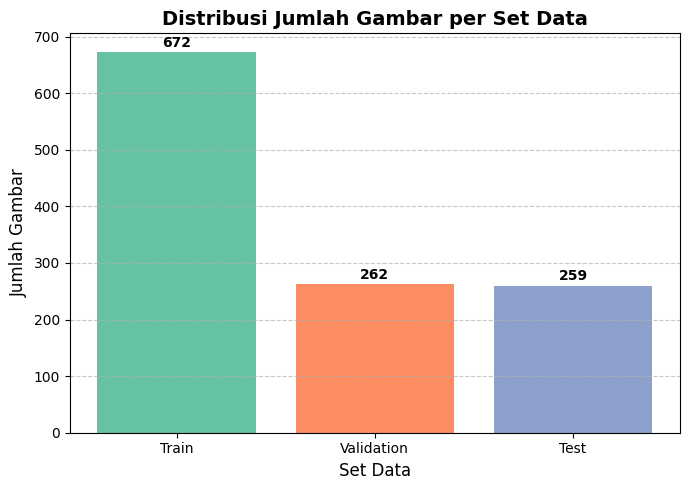

In [29]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict
from prettytable import PrettyTable
# Asumsikan Anda sudah mengimpor TensorFlow/Keras sebelumnya untuk membangun model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model # Tambahkan import Model jika Anda mendefinisikan model dengan functional API
# from tensorflow.keras.layers import Input, Flatten, GlobalAveragePooling2D # Contoh import jika model lebih kompleks
import tensorflow as tf # Tambahkan ini untuk placeholder 'x' jika Anda menguji bagian model saja

# Pastikan variabel direktori Anda sudah didefinisikan
base_dir = '/content/drive/MyDrive/Data_Ikan_Hias/ikanhias/ikanhias'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Hitung jumlah gambar di setiap set
train_samples = len([f for c in os.listdir(train_dir) for f in os.listdir(os.path.join(train_dir, c))])
val_samples = len([f for c in os.listdir(val_dir) for f in os.listdir(os.path.join(val_dir, c))])
test_samples = len([f for c in os.listdir(test_dir) for f in os.listdir(os.path.join(test_dir, c))])

# Dapatkan semua nama kelas (asumsi konsisten di train/val/test)
all_classes = sorted(os.listdir(train_dir))
total_classes = len(all_classes) # Ini adalah variabel yang harus Anda gunakan

# Fungsi untuk menghitung gambar per kelas di direktori tertentu
def count_images_per_class(directory):
    class_counts = defaultdict(int)
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

train_class_counts = count_images_per_class(train_dir)
val_class_counts = count_images_per_class(val_dir)
test_class_counts = count_images_per_class(test_dir)

# Gabungkan semua hitungan untuk menemukan 10 kelas teratas
combined_counts = defaultdict(int)
for cls in all_classes:
    combined_counts[cls] += train_class_counts.get(cls, 0)
    combined_counts[cls] += val_class_counts.get(cls, 0)
    combined_counts[cls] += test_class_counts.get(cls, 0)

# Urutkan kelas berdasarkan jumlah total secara menurun untuk mendapatkan 10 teratas
sorted_classes = sorted(combined_counts.items(), key=lambda item: item[1], reverse=True)
top_10_classes = [cls for cls, count in sorted_classes[:10]]

# Buat tabel
table = PrettyTable()
table.field_names = ["Nama Kelas", "Train", "Validation", "Test", "Total"]

# Tambahkan baris untuk setiap 10 kelas teratas
for class_name in top_10_classes:
    train_count = train_class_counts.get(class_name, 0)
    val_count = val_class_counts.get(class_name, 0)
    test_count = test_class_counts.get(class_name, 0)
    total_class_count = train_count + val_count + test_count
    table.add_row([class_name, train_count, val_count, test_count, total_class_count])

# Tambahkan pemisah dan baris total
table.add_row(["---", "---", "---", "---", "---"])
table.add_row(["Total (Semua Kelas)", train_samples, val_samples, test_samples, train_samples + val_samples + test_samples])

print("\n--- Distribusi Data per Kelas (Top 10) ---")
print(table)

print("\nSpesifikasi Dataset Lengkap:")
print(f"- Jumlah Total Kelas: {total_classes}")
print(f"- Total Gambar (Train): {train_samples}")
print(f"- Total Gambar (Validation): {val_samples}")
print(f"- Total Gambar (Test): {test_samples}")
print(f"- Sumber Data: https://www.kaggle.com/datasets/companionofprophet/ikanhias")
print(f"- Jenis Data: Gambar (JPG/PNG)")

# --- Kode plotting Anda yang sudah ada ---
sets = ['Train', 'Validation', 'Test']
samples = [train_samples, val_samples, test_samples]

plt.figure(figsize=(7, 5))
bars = plt.bar(sets, samples, color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.xlabel('Set Data', fontsize=12)
plt.ylabel('Jumlah Gambar', fontsize=12)
plt.title('Distribusi Jumlah Gambar per Set Data', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# --- Definisi model Anda (bagian yang diperbaiki) ---
# **PENTING:** Anda harus memastikan 'x' sudah didefinisikan dari lapisan model sebelumnya
# (misalnya, output dari model dasar konvolusional atau lapisan feature extraction lainnya).
# Contoh placeholder untuk 'x' jika Anda ingin menjalankan cuplikan ini secara terpisah untuk pengujian:
x = tf.random.normal(shape=(1, 512)) # Ini adalah contoh saja, ganti dengan output aktual dari model Anda.

x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout untuk mencegah overfitting
# Baris ini yang menyebabkan error, sekarang diperbaiki:
predictions = Dense(total_classes, activation='softmax')(x)

# Anda juga perlu mendefinisikan model final jika belum
# Contoh:
# from tensorflow.keras.layers import Input
# input_tensor = Input(shape=(224, 224, 3)) # Ganti dengan dimensi input gambar Anda
# # ... tambahkan lapisan-lapisan sebelumnya yang mengarah ke 'x'
# model = Model(inputs=input_tensor, outputs=predictions) # Contoh model fungsional Keras

**3. PRE-PROCESSING DAN AUGMENTASI DATA**

In [30]:
# ImageDataGenerator untuk augmentasi dan preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load data dari folder
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Cek nama kelas
class_names = list(train_generator.class_indices.keys())
print(f"Kelas: {class_names}")

Found 672 images belonging to 10 classes.
Found 262 images belonging to 10 classes.
Found 259 images belonging to 10 classes.
Kelas: ['Cupang', 'Discus', 'Guppy', 'Lemonfish', 'Lohan', 'Manfish', 'Maskoki', 'NeonTetra', 'Sapusapu', 'Zebra']


**4. BANGUN MODEL CNN DENGAN TRANSFER LEARNING**

In [34]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Definisikan path ke folder dataset
base_dir = '/content/drive/MyDrive/Data_Ikan_Hias/ikanhias/ikanhias'  # Sesuaikan jika struktur berbeda
train_dir = os.path.join(base_dir, 'train')

# Cek apakah train_dir ada
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Folder {train_dir} tidak ditemukan. Periksa path dataset.")

# Cek isi folder train
print("Isi folder train:", os.listdir(train_dir))

# 3. Buat generator untuk data training
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

# Dapatkan jumlah kelas
num_classes = train_generator.num_classes
print(f"Jumlah kelas: {num_classes}")

# 4. Load model MobileNetV2 pre-trained (tanpa top layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Bekukan layer base model
base_model.trainable = False

# Tambahkan layer kustom
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout untuk mencegah overfitting
predictions = Dense(num_classes, activation='softmax')(x)

# Buat model final
model = Model(inputs=base_model.input, outputs=predictions)

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Ringkasan model
model.summary()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Isi folder train: ['Sapusapu', 'NeonTetra', 'Zebra', 'Maskoki', 'Cupang', 'Discus', 'Guppy', 'Lemonfish', 'Lohan', 'Manfish']
Found 672 images belonging to 10 classes.
Jumlah kelas: 10


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_10[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,918,986 (11.14 MB)

 Trainable params: 661,002 (2.52 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [14]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import os
import shutil
import pandas as pd # Tidak langsung digunakan di sini, tapi bagus untuk tetap ada
import numpy as np # Tidak langsung digunakan di sini, tapi bagus untuk tetap ada
import pickle # Untuk menyimpan history pelatihan

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2 # Pastikan MobileNetV2 diimpor
from tensorflow.keras.regularizers import l2 # Import l2 untuk regularisasi

# --- TAHAP 0: Setup Awal (Mount Google Drive, Definisi Path & Hyperparameter) ---
print("--- TAHAP 0: Setup Awal ---")

# Menyambungkan Google Drive (PENTING: Pastikan ini sudah dijalankan!)
try:
    from google.colab import drive
    drive.mount('/content/drive')
    print("✅ Google Drive berhasil terhubung!")
except Exception as e:
    print(f"❌ Gagal menghubungkan Google Drive: {str(e)}")
    # raise Exception("Gagal menghubungkan Google Drive") # Tidak perlu raise di sini, biarkan kode berlanjut jika tidak kritis

# Definisikan Path Folder
drive_folder = '/content/drive/MyDrive/Data_Ikan_Hias'
subfolder = os.path.join(drive_folder, 'ikanhias')
os.makedirs(subfolder, exist_ok=True) # Pastikan folder ada

# Asumsi struktur data: /content/drive/MyDrive/Data_Ikan_Hias/ikanhias/ikanhias/train
base_data_path = os.path.join(subfolder, 'ikanhias')

train_dir = os.path.join(base_data_path, 'train')
val_dir = os.path.join(base_data_path, 'val')
test_dir = os.path.join(base_data_path, 'test') # Tambahkan test_dir untuk kelengkapan

# Hyperparameter Umum
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
BATCH_SIZE = 32 # Gunakan 32 sesuai bagian pertama Anda

# Path penyimpanan model dan history untuk setiap tahap
model_initial_save_path = os.path.join(subfolder, 'best_model_initial.keras') # Model setelah head training
history_initial_pkl_path = os.path.join(subfolder, 'history_initial.pkl')

model_fine1_save_path = os.path.join(subfolder, 'best_model_fine1.keras') # Model setelah fine-tuning 1
history_fine1_pkl_path = os.path.join(subfolder, 'history_fine1.pkl')

model_fine2_save_path = os.path.join(subfolder, 'best_model_fine2.keras') # Model setelah fine-tuning 2
history_fine2_pkl_path = os.path.join(subfolder, 'history_fine2.pkl')

# --- 0.1 Inisialisasi Data Generators ---
print("\nMenginisialisasi Data Generators...")

# Augmentasi data agresif untuk training
train_datagen_aggressive = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, # Lebih agresif
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.4, # Lebih agresif
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.7, 1.3], # Lebih agresif
    channel_shift_range=20.0, # Pergeseran channel warna
    fill_mode='nearest'
)

# Datagen untuk validasi dan test (hanya rescaling)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen_aggressive.flow_from_directory(
    train_dir,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)
print(f"Found {train_generator.samples} images belonging to {train_generator.num_classes} classes for training.")

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)
print(f"Found {val_generator.samples} images belonging to {val_generator.num_classes} classes for validation.")

# Pastikan jumlah kelas konsisten
NUM_CLASSES = train_generator.num_classes
print(f"Ditemukan {NUM_CLASSES} kelas.")

--- TAHAP 0: Setup Awal ---
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive berhasil terhubung!

Menginisialisasi Data Generators...
Found 672 images belonging to 10 classes.
Found 672 images belonging to 10 classes for training.
Found 262 images belonging to 10 classes.
Found 262 images belonging to 10 classes for validation.
Ditemukan 10 kelas.


**5. LATIH MODEL (AUGMENTASI DAN REGULARISASI)**

In [ ]:
# --- TAHAP 1: Initial Training (Melatih Classification Head) ---
print("\n--- TAHAP 1: Initial Training (Melatih Classification Head) ---")

# Bangun base model (MobileNetV2)
# Beri nama eksplisit pada base model agar mudah diidentifikasi nanti
base_model = MobileNetV2(weights='imagenet', include_top=False,
                         input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3),
                         name='mobilenetv2_base_model') # Beri nama di sini!
base_model.trainable = False # Bekukan base model pada tahap awal ini

# Bangun classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
# Gunakan `l2` regularizer (pastikan diimpor: from tensorflow.keras.regularizers import l2)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.02))(x)
x = Dropout(0.6)(x) # Dropout lebih tinggi untuk mencegah overfitting
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Buat model final
model = Model(inputs=base_model.input, outputs=predictions, name='initial_fish_classifier')

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001), # Learning rate lebih tinggi untuk head training
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Callback untuk tahap ini
callbacks_initial = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ModelCheckpoint(model_initial_save_path, monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
]

# Training tahap awal
print(f"\nMemulai Initial Training (maksimal 50 epochs)...")
history_initial = model.fit(
    train_generator,
    epochs=50, # Sesuai kode Anda
    validation_data=val_generator,
    callbacks=callbacks_initial,
    verbose=1
)

# Simpan history ke Google Drive
with open(history_initial_pkl_path, 'wb') as f:
    pickle.dump(history_initial.history, f)
print(f"📦 History (pickle) disimpan di: {history_initial_pkl_path}")

# Verifikasi model disimpan oleh ModelCheckpoint (jika ada perbaikan val_accuracy)
if os.path.exists(model_initial_save_path):
    print(f"✅ Model terbaik dari Initial Training disimpan di: {model_initial_save_path}")
else:
    print(f"❌ Model terbaik dari Initial Training TIDAK ditemukan. Mungkin EarlyStopping terpicu atau val_accuracy tidak membaik.")

print("\n--- Proses Initial Training Selesai ---")



--- TAHAP 1: Initial Training (Melatih Classification Head) ---


Model: "initial_fish_classifier"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,918,986 (11.14 MB)

 Trainable params: 661,002 (2.52 MB)

 Non-trainable params: 2,257,984 (8.61 MB)


Memulai Initial Training (maksimal 50 epochs)...
Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 640ms/step - accuracy: 0.2512 - loss: 16.0156
Epoch 1: val_accuracy improved from -inf to 0.77863, saving model to /content/drive/MyDrive/Data_Ikan_Hias/ikanhias/best_model_initial.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.2567 - loss: 15.9458 - val_accuracy: 0.7786 - val_loss: 11.0811 - learning_rate: 0.0010
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 698ms/step - accuracy: 0.6440 - loss: 10.4996
Epoch 2: val_accuracy improved from 0.77863 to 0.85878, saving model to /content/drive/MyDrive/Data_Ikan_Hias/ikanhias/best_model_initial.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 803ms/step - accuracy: 0.6457 - loss: 10.4613 - val_accuracy: 0.8588 - val_loss: 7.6274 - learning_rate: 0.0010
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 665ms/step - accuracy: 0.6915 - loss: 7.4878
Epoch 3: val_accuracy improved from 0.85878 to 0.89695, saving model to /content/drive/MyDrive/Data_Ikan_Hias/ikanhias/be

Model berhasil dimuat dari: /content/drive/MyDrive/Data_Ikan_Hias/ikanhias/best_model_initial.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 142s 15s/step


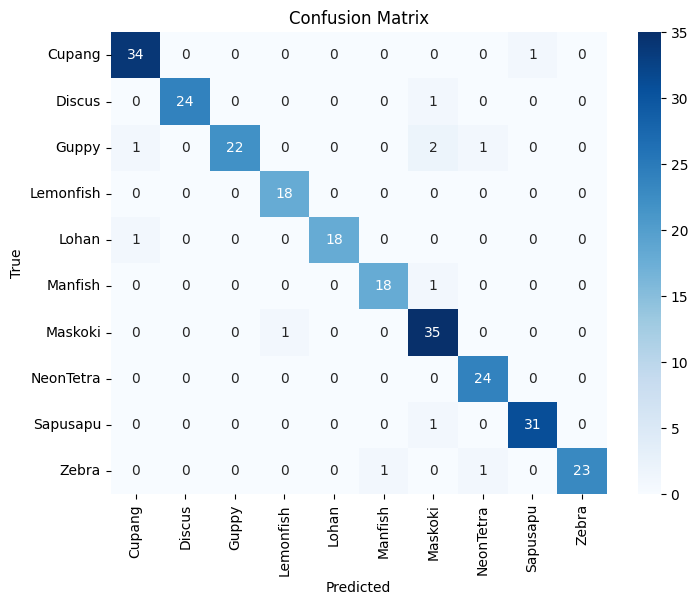

              precision    recall  f1-score   support

      Cupang       0.94      0.97      0.96        35
      Discus       1.00      0.96      0.98        25
       Guppy       1.00      0.85      0.92        26
   Lemonfish       0.95      1.00      0.97        18
       Lohan       1.00      0.95      0.97        19
     Manfish       0.95      0.95      0.95        19
     Maskoki       0.88      0.97      0.92        36
   NeonTetra       0.92      1.00      0.96        24
    Sapusapu       0.97      0.97      0.97        32
       Zebra       1.00      0.92      0.96        25

    accuracy                           0.95       259
   macro avg       0.96      0.95      0.96       259
weighted avg       0.96      0.95      0.95       259



In [35]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import os # Import os untuk path manipulation
import tensorflow as tf # Import tensorflow untuk load_model

# Definisikan path folder utama dan subfolder
drive_folder = '/content/drive/MyDrive/Data_Ikan_Hias'
subfolder = os.path.join(drive_folder, 'ikanhias')

# Pastikan model terbaik dimuat
model_path = 'best_model.keras'
model_drive_path = os.path.join(subfolder, 'best_model_initial.keras')

# --- PERBAIKAN PENTING DI SINI ---
# Muat model terbaik dari lokasi yang sudah ditentukan
try:
    model = tf.keras.models.load_model(model_drive_path)
    print("Model berhasil dimuat dari:", model_drive_path)
except Exception as e:
    print(f"Gagal memuat model dari {model_drive_path}. Error: {e}")
    # Anda mungkin ingin menambahkan penanganan error di sini,
    # misalnya keluar dari program atau menggunakan model default.
    exit() # Atau raise e untuk melihat error lebih detail

# Prediksi pada test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=class_names))

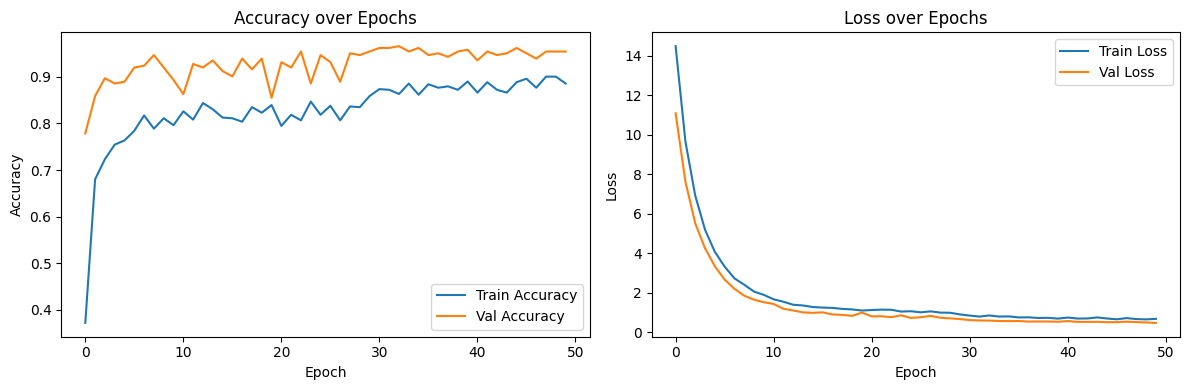

In [36]:
import pickle
import matplotlib.pyplot as plt

# Path ke file history fine-tuning
history_pkl_path = '/content/drive/MyDrive/Data_Ikan_Hias/ikanhias/history_initial.pkl'

# Load isi file history
with open(history_pkl_path, 'rb') as f:
    history_data = pickle.load(f)

# Plot grafik akurasi dan loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_data['accuracy'], label='Train Accuracy')
plt.plot(history_data['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_data['loss'], label='Train Loss')
plt.plot(history_data['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


**6. FINE-TUNING**

In [ ]:
# --- TAHAP 2: Fine-tuning Pertama (Partial Unfreeze) ---
print("\n--- TAHAP 2: Fine-tuning Pertama (Partial Unfreeze) ---")

# Muat model terbaik dari tahap Initial Training
try:
    model = load_model(model_initial_save_path)
    print(f"\n✅ Model '{model_initial_save_path}' berhasil dimuat untuk fine-tuning pertama.")
except Exception as e:
    print(f"❌ Gagal memuat model dari '{model_initial_save_path}'. Error: {e}")
    print("Pastikan tahap Initial Training telah berhasil menyimpan model.")
    exit() # Hentikan eksekusi jika model tidak dapat dimuat

# Identifikasi Base Model
base_model_found = None
for layer in model.layers:
    # Cari base model berdasarkan nama yang kita berikan sebelumnya
    if layer.name == 'mobilenetv2_base_model': # Harus sesuai dengan nama di TAHAP 1
        base_model_found = layer
        break

if base_model_found:
    print(f"Base model '{base_model_found.name}' ditemukan.")
    # Buka semua layer di base model
    base_model_found.trainable = True

    # Bekukan 30 layer pertama dari base model
    for layer in base_model_found.layers[:30]: # Jumlah layer yang dibekukan sesuai kode Anda
        layer.trainable = False
    print(f"Dari {len(base_model_found.layers)} layer di base model '{base_model_found.name}':")
    print(f"   - {len(base_model_found.layers[:30])} layer pertama dibekukan.")
    print(f"   - {len(base_model_found.layers[30:])} layer sisanya dibuka untuk fine-tuning.")
else:
    print("❌ Base model tidak ditemukan dengan nama 'mobilenetv2_base_model'.")
    print("Akan mencoba membuka/membekukan layer pada model secara keseluruhan. Ini mungkin tidak optimal.")
    # Fallback: jika base model tidak ditemukan, bekukan 30 layer pertama dari seluruh model
    model.trainable = True # Pastikan semua layer model bisa dilatih
    for i, layer in enumerate(model.layers):
        if i < 30:
            layer.trainable = False
        else:
            layer.trainable = True
    print(f"Dari {len(model.layers)} layer di model keseluruhan:")
    print(f"   - {len([l for i, l in enumerate(model.layers) if i < 30])} layer pertama dibekukan.")
    print(f"   - {len([l for i, l in enumerate(model.layers) if i >= 30])} layer sisanya dibuka untuk fine-tuning.")


# Kompilasi ulang model dengan learning rate yang lebih rendah
model.compile(optimizer=Adam(learning_rate=1e-5), # Learning rate lebih kecil
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary() # Cek trainable params setelah perubahan

# Callback untuk tahap fine-tuning pertama
callbacks_fine1 = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ModelCheckpoint(model_fine1_save_path, monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)
]

# Training fine-tuning pertama
print(f"\nMemulai Fine-tuning Tahap Pertama (maksimal 30 epochs)...")
history_fine1 = model.fit(
    train_generator,
    epochs=30, # Sesuai kode Anda
    validation_data=val_generator,
    callbacks=callbacks_fine1,
    verbose=1
)

# Simpan history
with open(history_fine1_pkl_path, 'wb') as f:
    pickle.dump(history_fine1.history, f)
print(f"📦 History (pickle) disimpan ke: {history_fine1_pkl_path}")

# Verifikasi model disimpan
if os.path.exists(model_fine1_save_path):
    print(f"✅ Model fine-tuned pertama disimpan ke: {model_fine1_save_path}")
else:
    print("❌ Model fine-tuned pertama TIDAK ditemukan. Periksa log pelatihan.")

print("\n--- Proses Fine-tuning Tahap Pertama Selesai ---")



--- TAHAP 2: Fine-tuning Pertama (Partial Unfreeze) ---

✅ Model '/content/drive/MyDrive/Data_Ikan_Hias/ikanhias/best_model_initial.keras' berhasil dimuat untuk fine-tuning pertama.
❌ Base model tidak ditemukan dengan nama 'mobilenetv2_base_model'.
Akan mencoba membuka/membekukan layer pada model secara keseluruhan. Ini mungkin tidak optimal.
Dari 158 layer di model keseluruhan:
   - 30 layer pertama dibekukan.
   - 128 layer sisanya dibuka untuk fine-tuning.


Model: "initial_fish_classifier"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,918,986 (11.14 MB)

 Trainable params: 2,865,338 (10.93 MB)

 Non-trainable params: 53,648 (209.56 KB)


Memulai Fine-tuning Tahap Pertama (maksimal 30 epochs)...
Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 0.7260 - loss: 1.2661
Epoch 1: val_accuracy improved from -inf to 0.96947, saving model to /content/drive/MyDrive/Data_Ikan_Hias/ikanhias/best_model_fine1.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.7270 - loss: 1.2644 - val_accuracy: 0.9695 - val_loss: 0.5727 - learning_rate: 1.0000e-05
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.7818 - loss: 1.1265
Epoch 2: val_accuracy did not improve from 0.96947
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 807ms/step - accuracy: 0.7817 - loss: 1.1263 - val_accuracy: 0.9695 - val_loss: 0.5559 - learning_rate: 1.0000e-05
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 669ms/step - accuracy: 0.8331 - loss: 1.0162
Epoch 3: val_accuracy did not improve from 0.96947
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 750ms/step - accuracy: 0.8331 - loss: 1.0158 - val_accuracy: 0.9656 - val_loss: 0.5436 - learning_rate: 1.0000e-05
Epoch 4

**7. EVALUASI DAN ANALISIS PERFORMA**

9/9 ━━━━━━━━━━━━━━━━━━━━ 128s 14s/step


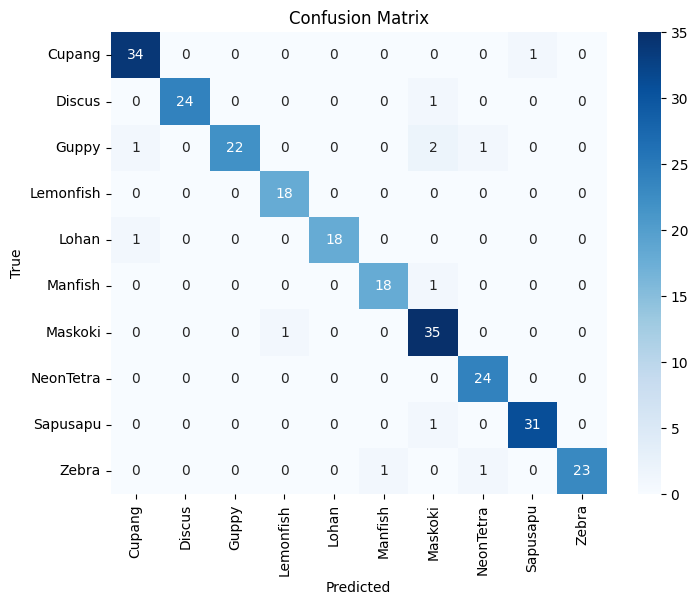

              precision    recall  f1-score   support

      Cupang       0.94      0.97      0.96        35
      Discus       1.00      0.96      0.98        25
       Guppy       1.00      0.85      0.92        26
   Lemonfish       0.95      1.00      0.97        18
       Lohan       1.00      0.95      0.97        19
     Manfish       0.95      0.95      0.95        19
     Maskoki       0.88      0.97      0.92        36
   NeonTetra       0.92      1.00      0.96        24
    Sapusapu       0.97      0.97      0.97        32
       Zebra       1.00      0.92      0.96        25

    accuracy                           0.95       259
   macro avg       0.96      0.95      0.96       259
weighted avg       0.96      0.95      0.95       259



In [37]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan path folder utama dan subfolder
drive_folder = '/content/drive/MyDrive/Data_Ikan_Hias'
subfolder = os.path.join(drive_folder, 'ikanhias')

# Pastikan model terbaik dimuat
model_path = 'best_model_fine.keras'
model_drive_path = os.path.join(subfolder, 'best_model_fine1.keras')

# Prediksi pada test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=class_names))

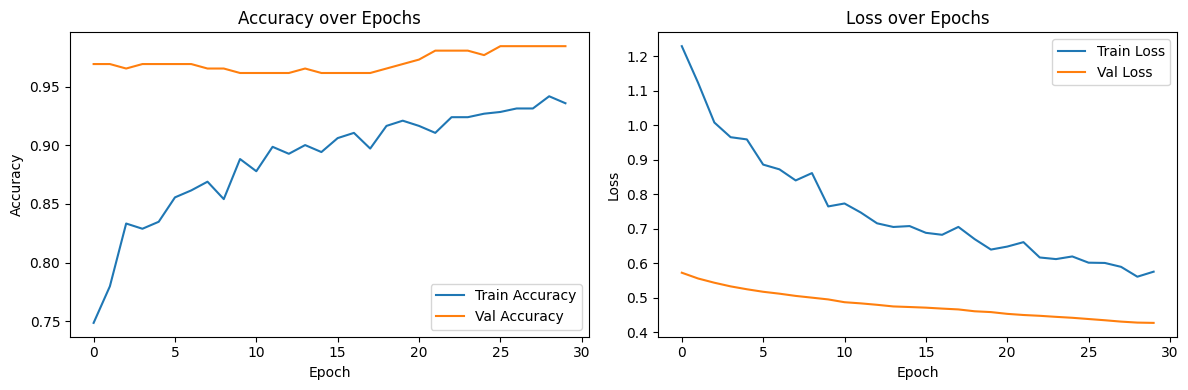

In [ ]:
import pickle
import matplotlib.pyplot as plt

# Path ke file history fine-tuning
history_pkl_path = '/content/drive/MyDrive/Data_Ikan_Hias/ikanhias/history_fine1.pkl'

# Load isi file history
with open(history_pkl_path, 'rb') as f:
    history_data = pickle.load(f)

# Plot grafik akurasi dan loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_data['accuracy'], label='Train Accuracy')
plt.plot(history_data['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_data['loss'], label='Train Loss')
plt.plot(history_data['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**8. FINE-TUNING LANJUTAN**

In [ ]:
# --- TAHAP 3: Fine-tuning Kedua (Deeper Unfreeze) ---
print("\n--- TAHAP 3: Fine-tuning Kedua (Deeper Unfreeze) ---")

# Muat model terbaik dari tahap Fine-tuning Pertama
try:
    model = load_model(model_fine1_save_path) # Muat model dari tahap fine-tuning pertama
    print(f"\n✅ Model '{model_fine1_save_path}' berhasil dimuat untuk fine-tuning kedua.")
except Exception as e:
    print(f"❌ Gagal memuat model dari '{model_fine1_save_path}'. Error: {e}")
    print("Pastikan tahap Fine-tuning Pertama telah berhasil menyimpan model.")
    exit() # Hentikan eksekusi jika model tidak dapat dimuat

# Identifikasi Base Model lagi
base_model_found = None
for layer in model.layers:
    if layer.name == 'mobilenetv2_base_model': # Cari berdasarkan nama yang sama
        base_model_found = layer
        break

if base_model_found:
    print(f"Base model '{base_model_found.name}' ditemukan.")
    # Buka semua layer di base model
    base_model_found.trainable = True

    # Bekukan lapisan awal yang lebih sedikit dari base model (misal: 10 layer pertama)
    # Ini membuka lebih banyak layer untuk dilatih
    for layer in base_model_found.layers[:10]: # Sesuaikan jumlah layer yang dibekukan
        layer.trainable = False
    print(f"Dari {len(base_model_found.layers)} layer di base model '{base_model_found.name}':")
    print(f"   - {len(base_model_found.layers[:10])} layer pertama dibekukan.")
    print(f"   - {len(base_model_found.layers[10:])} layer sisanya dibuka untuk fine-tuning.")
else:
    print("❌ Base model tidak ditemukan dengan nama 'mobilenetv2_base_model'.")
    print("Akan mencoba membuka/membekukan layer pada model secara keseluruhan. Ini mungkin tidak optimal.")
    # Fallback: Jika base model tidak ditemukan, bekukan 10 layer pertama dari seluruh model
    model.trainable = True # Pastikan semua layer model bisa dilatih
    for i, layer in enumerate(model.layers):
        if i < 10:
            layer.trainable = False
        else:
            layer.trainable = True
    print(f"Dari {len(model.layers)} layer di model keseluruhan:")
    print(f"   - {len([l for i, l in enumerate(model.layers) if i < 10])} layer pertama dibekukan.")
    print(f"   - {len([l for i, l in enumerate(model.layers) if i >= 10])} layer sisanya dibuka untuk fine-tuning.")

# Kompilasi ulang model dengan learning rate SANGAT kecil
model.compile(optimizer=Adam(learning_rate=0.000005), # Learning rate sangat kecil
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary() # Sangat direkomendasikan untuk melihat summary setelah perubahan `trainable`

# Callback untuk pelatihan tahap kedua
callbacks_fine2 = [
    EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True, verbose=1),
    ModelCheckpoint(model_fine2_save_path, monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=1e-8, verbose=1)
]

# Melakukan Fine-tuning Tahap Kedua
print(f"\nMemulai Fine-tuning Tahap Kedua (maksimal 70 epochs)...")
history_fine2 = model.fit(
    train_generator,
    epochs=70, # Sesuai kode Anda
    validation_data=val_generator,
    callbacks=callbacks_fine2,
    verbose=1
)

# Simpan model dan history ke Google Drive
print("\nMenyimpan model dan history...")
if os.path.exists(model_fine2_save_path):
    shutil.copy(model_fine2_save_path, os.path.join(subfolder, 'best_model_final.keras')) # Simpan sebagai final
    print(f"✅ Model '{model_fine2_save_path}' disimpan ke: {os.path.join(subfolder, 'best_model_final.keras')}")
else:
    print(f"❌ Model '{model_fine2_save_path}' tidak ditemukan. ModelCheckpoint mungkin tidak menyimpan model terbaik.")
    print("Periksa log pelatihan di atas untuk melihat apakah EarlyStopping terpicu terlalu cepat atau val_accuracy tidak membaik.")

with open(history_fine2_pkl_path, 'wb') as f:
    pickle.dump(history_fine2.history, f)
print(f"📦 History (pickle) disimpan ke: {history_fine2_pkl_path}")

# Verifikasi isi folder di Drive
print("\n📁 Isi folder Data_Ikan_Hias/ikanhias di Drive:")
print(os.listdir(subfolder))

print("\n--- Proses Fine-tuning Tahap Kedua Selesai ---")


--- TAHAP 3: Fine-tuning Kedua (Deeper Unfreeze) ---

✅ Model '/content/drive/MyDrive/Data_Ikan_Hias/ikanhias/best_model_fine1.keras' berhasil dimuat untuk fine-tuning kedua.
❌ Base model tidak ditemukan dengan nama 'mobilenetv2_base_model'.
Akan mencoba membuka/membekukan layer pada model secara keseluruhan. Ini mungkin tidak optimal.
Dari 158 layer di model keseluruhan:
   - 10 layer pertama dibekukan.
   - 148 layer sisanya dibuka untuk fine-tuning.


Model: "initial_fish_classifier"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,918,986 (11.14 MB)

 Trainable params: 2,881,514 (10.99 MB)

 Non-trainable params: 37,472 (146.38 KB)


Memulai Fine-tuning Tahap Kedua (maksimal 70 epochs)...
Epoch 1/70
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 676ms/step - accuracy: 0.9438 - loss: 0.5938
Epoch 1: val_accuracy improved from -inf to 0.98092, saving model to /content/drive/MyDrive/Data_Ikan_Hias/ikanhias/best_model_fine2.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9432 - loss: 0.5947 - val_accuracy: 0.9809 - val_loss: 0.4371 - learning_rate: 5.0000e-06
Epoch 2/70
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 725ms/step - accuracy: 0.9278 - loss: 0.6105
Epoch 2: val_accuracy improved from 0.98092 to 0.98473, saving model to /content/drive/MyDrive/Data_Ikan_Hias/ikanhias/best_model_fine2.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 893ms/step - accuracy: 0.9276 - loss: 0.6108 - val_accuracy: 0.9847 - val_loss: 0.4357 - learning_rate: 5.0000e-06
Epoch 3/70
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 743ms/step - accuracy: 0.9386 - loss: 0.5766
Epoch 3: val_accuracy did not improve from 0.98473
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 826ms/step - accuracy: 0.9379 - l

**9. EVALUASI MODEL KE-2**

Found 259 images belonging to 10 classes.
✅ Model dimuat dari: /content/drive/MyDrive/Data_Ikan_Hias/ikanhias/best_model_final.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step - accuracy: 0.9821 - loss: 0.4036

📊 Evaluasi pada Test Set:
Test Loss     : 0.4248
Test Accuracy : 0.9807


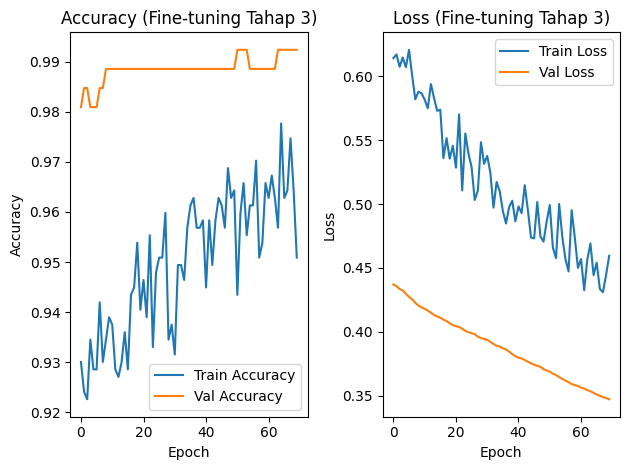

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os # Pastikan os juga diimpor
import pickle # ⬅️ TAMBAHKAN BARIS INI

# Path ke Google Drive
drive_folder = '/content/drive/MyDrive/Data_Ikan_Hias'
subfolder = os.path.join(drive_folder, 'ikanhias')

# Path test set
test_dir = os.path.join(subfolder, 'ikanhias/test')  # pastikan path test sesuai

# Load test data
val_test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

# Load model fine-tuning tahap ke-3
model_path_final = os.path.join(subfolder, 'best_model_final.keras')
model = load_model(model_path_final)
print(f"✅ Model dimuat dari: {model_path_final}")

# Evaluasi model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\n📊 Evaluasi pada Test Set:")
print(f"Test Loss     : {test_loss:.4f}")
print(f"Test Accuracy : {test_accuracy:.4f}")

# Load history tahap ke-3 dari pickle
history_pkl_path = os.path.join(subfolder, 'history_fine2.pkl')
with open(history_pkl_path, 'rb') as f:
    history_fine2 = pickle.load(f)

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history_fine2['accuracy'], label='Train Accuracy')
plt.plot(history_fine2['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy (Fine-tuning Tahap 3)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_fine2['loss'], label='Train Loss')
plt.plot(history_fine2['val_loss'], label='Val Loss')
plt.title('Loss (Fine-tuning Tahap 3)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**10. ANALISIS CONFUSION MATRIX KE-2**

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load test data (pastikan shuffle=False untuk sinkronisasi label)
val_test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

# Load model terbaik
model_drive_path = os.path.join(subfolder, 'best_model_final.keras')

# Prediksi pada test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=class_names))

Found 259 images belonging to 10 classes.


NameError: name 'model' is not defined

**11. UJI COBA GAMBAR**

In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import files

# Load model terbaik
model_drive_path = os.path.join(subfolder, 'best_model_final.keras')

# Load nama kelas dari test generator (sesuaikan dengan tahap sebelumnya)
val_test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)
class_names = list(test_generator.class_indices.keys())

# Upload gambar
print("Unggah gambar ikan hias (format JPG/PNG):")
uploaded = files.upload()

# Ambil nama file gambar yang diunggah
img_path = list(uploaded.keys())[0]

# Preprocessing gambar
img = load_img(img_path, target_size=(224, 224))  # Resize ke 224x224
img_array = img_to_array(img) / 255.0  # Normalisasi ke [0,1]
img_array = np.expand_dims(img_array, axis=0)  # Tambah dimensi batch

# Prediksi kelas
prediction = model.predict(img_array)
predicted_class_idx = np.argmax(prediction, axis=1)[0]
predicted_class = class_names[predicted_class_idx]
probabilities = prediction[0]
max_probability = probabilities[predicted_class_idx] * 100

# Tampilkan gambar dengan kondisi probabilitas
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
if max_probability < 60:
    plt.title("Prediksi: Ikan tidak terdeteksi")
else:
    plt.title(f'Prediksi: {predicted_class} ({max_probability:.2f}%)')
plt.show()

# Tampilkan probabilitas semua kelas
print("\nProbabilitas per kelas:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {probabilities[i]*100:.2f}%")

Found 259 images belonging to 10 classes.
Unggah gambar ikan hias (format JPG/PNG):


Saving 00000084.jpg to 00000084.jpg


NameError: name 'model' is not defined

**13. MENGHUBUNGKAN KE ANVIL**

In [38]:
# Install dan import semua library
!pip install anvil-uplink

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.7 MB/s eta 0:00:00


In [ ]:
import anvil.server
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
from PIL import Image
import io
import numpy as np
import os
from google.colab import drive

# Menyambungkan Google Drive
try:
    drive.mount('/content/drive')
    print("✅ Google Drive berhasil terhubung!")
except Exception as e:
    print(f"❌ Gagal menghubungkan Google Drive: {str(e)}")
    raise Exception("Gagal menghubungkan Google Drive")

# Definisikan path folder dan file model
drive_folder = '/content/drive/MyDrive/Data_Ikan_Hias'
model_path = '/content/drive/MyDrive/Data_Ikan_Hias/ikanhias/best_model_fine2.keras'

# Periksa apakah file model ada
if not os.path.exists(model_path):
    print(f"❌ File model tidak ditemukan di: {model_path}")
    print("Periksa kembali path atau pastikan file sudah ada di Google Drive.")
    raise Exception("File model tidak ditemukan")

# Load model yang sudah dilatih
try:
    model = load_model(model_path)
    print("✅ Model berhasil dimuat!")
except Exception as e:
    print(f"❌ Gagal memuat model: {str(e)}")
    raise Exception("Gagal memuat model")

# Daftar nama kelas sesuai urutan saat pelatihan
class_names = ['Cupang', 'Discus', 'Guppy', 'Lemonfish', 'Lohan', 'Manfish', 'Maskoki', 'NeonTetra', 'Sapusapu', 'Zebra']

# Hubungkan ke server Anvil
try:
    anvil.server.connect("server_ZOYYSJJXSUKOHFLN5FTATW4D-SHGBXSUQMFINIUKA")
    print("✅ Berhasil terhubung ke server Anvil dengan kunci: server_WSR3BCAA5XI76MJBAHSV7DLU-YAPAY6XQJ2ZXVRGY")
except Exception as e:
    print(f"❌ Gagal terhubung ke server Anvil: {str(e)}")
    raise Exception("Gagal terhubung ke server Anvil")

# Fungsi untuk mengklasifikasi gambar yang diunggah
@anvil.server.callable
def classify_image(file):
    print(f"Terima file: {file}")
    try:
        # Pastikan file adalah objek media Anvil
        if not hasattr(file, 'get_bytes'):
            raise ValueError("File bukan objek media Anvil yang valid.")
        img = Image.open(io.BytesIO(file.get_bytes())).resize((224, 224))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Lakukan prediksi
        prediction = model.predict(img_array)[0]
        predicted_class_idx = np.argmax(prediction)
        predicted_class = class_names[predicted_class_idx]
        max_prob = prediction[predicted_class_idx] * 100

        # Buat dictionary untuk semua probabilitas
        all_probs = {class_name: prob * 100 for class_name, prob in zip(class_names, prediction)}

        # Kembalikan respons terstruktur
        return {
            'status': 'success',
            'predicted_class': predicted_class,
            'probability': max_prob,
            'all_probs': all_probs
        }
    except Exception as e:
        print(f"Error saat memproses gambar: {str(e)}")
        return {
            'status': 'error',
            'message': f"Gagal memproses gambar: {str(e)}"
        }

# Jaga koneksi server tetap hidup
anvil.server.wait_forever()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive berhasil terhubung!
✅ Model berhasil dimuat!
✅ Berhasil terhubung ke server Anvil dengan kunci: server_WSR3BCAA5XI76MJBAHSV7DLU-YAPAY6XQJ2ZXVRGY
Terima file: <anvil._serialise.StreamingMedia object at 0x7cd2d162ed50>
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Terima file: <anvil._serialise.StreamingMedia object at 0x7cd2d14200d0>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
Terima file: <anvil._serialise.StreamingMedia object at 0x7cd2d17b5790>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
Terima file: <anvil._serialise.StreamingMedia object at 0x7cd2e0344110>
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


**VISUALISASI PREDIKSI VS AKTUAL**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Subfolder /content/drive/MyDrive/Data_Ikan_Hias/ikanhias sudah ada.
Model dimuat dari /content/drive/MyDrive/Data_Ikan_Hias/ikanhias/best_model_final.keras
Found 259 images belonging to 10 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


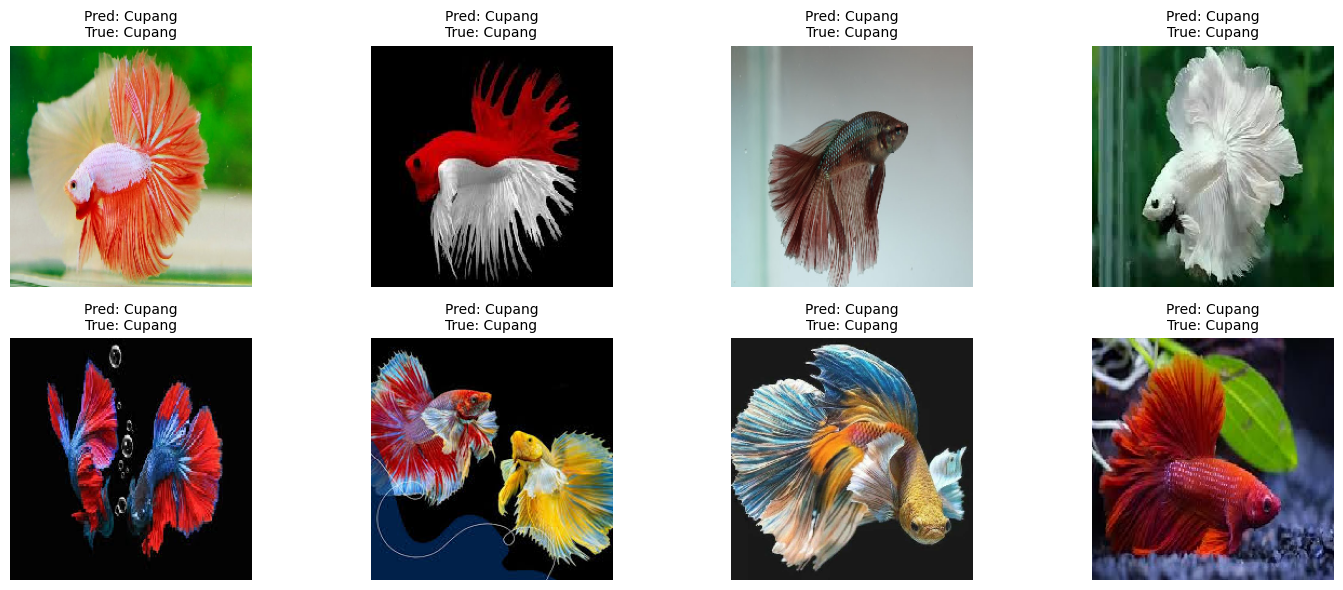

File disimpan ke /content/drive/MyDrive/Data_Ikan_Hias/ikanhias/prediksi_vs_aktual.png
Isi subfolder Data_Ikan_Hias/ikanhias:
['ikanhias', 'best_model_initial.keras', 'history_initial.pkl', 'best_model_fine1.keras', 'history_fine1.pkl', 'best_model_fine2.keras', 'best_model_final.keras', 'history_fine2.pkl', 'prediksi_vs_aktual.png']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Menyambungkan Google Drive
drive.mount('/content/drive')

# Definisikan path
base_dir = '/content/drive/MyDrive/Data_Ikan_Hias/ikanhias/ikanhias'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
subfolder = '/content/drive/MyDrive/Data_Ikan_Hias/ikanhias'

# Verifikasi subfolder
if not os.path.exists(subfolder):
    os.makedirs(subfolder)
    print(f"Subfolder {subfolder} dibuat.")
else:
    print(f"Subfolder {subfolder} sudah ada.")

# Muat model dari Drive
model_path = os.path.join(subfolder, 'best_model_final.keras')
if os.path.exists(model_path):
    model = tf.keras.models.load_model(model_path)
    print(f"Model dimuat dari {model_path}")
else:
    print(f"Model tidak ditemukan di {model_path}")
    raise FileNotFoundError("Model tidak ada. Periksa path atau jalankan fine-tuning.")

# Definisikan test generator
val_test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Penting untuk urutan konsisten
)

# Ambil sampel dari test set
test_generator.reset()
images, labels = next(test_generator)
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)
class_names = sorted(os.listdir(train_dir))  # Urutkan untuk konsistensi

# Plot prediksi vs aktual
plt.figure(figsize=(15, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i])  # Gambar sudah dalam [0, 1]
    plt.title(f'Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[true_classes[i]]}', fontsize=10)
    plt.axis('off')
plt.tight_layout()

# Simpan plot ke lokal
plot_path = '/content/prediksi_vs_aktual.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()

# Salin plot ke Drive
drive_plot_path = os.path.join(subfolder, 'prediksi_vs_aktual.png')
if os.path.exists(plot_path):
    shutil.copy(plot_path, drive_plot_path)
    print(f"File disimpan ke {drive_plot_path}")
else:
    print(f"File {plot_path} tidak ditemukan di /content/.")

# Verifikasi isi subfolder
print("Isi subfolder Data_Ikan_Hias/ikanhias:")
print(os.listdir(subfolder))